## Fixed-Point Differentiation with the Implicit Function Theorem

The **Implicit Function Theorem** is a powerful tool in calculus that allows us to find derivatives of implicitly defined functions. Here's the key idea:

Given a well-behaved function $f(x, y)$ such that $f(x_0, y_0) = 0$ for some point $(x_0, y_0)$, there exists a function $\phi(x)$ defined in a neighborhood of $x_0$ such that:

$$f(x, \phi(x)) = 0$$

for all $x$ close to $x_0$, and $\phi(x_0) = y_0$.

To find the derivative $\frac{d\phi}{dx}$ of this implicitly defined function $\phi(x)$, we use the following approach:

1. Start with the equation: $f(x, \phi(x)) = 0$
2. Take the total derivative with respect to $x$ on both sides
3. Apply the chain rule on the left side
4. The right side remains 0 (derivative of constant)

This gives us:
$$\frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} \cdot \frac{d\phi}{dx} = 0$$

Solving for $\frac{d\phi}{dx}$:

$$\frac{d\phi}{dx} = -\frac{\partial f/\partial x}{\partial f/\partial y} = -\left(\frac{\partial f}{\partial y}\right)^{-1} \cdot \frac{\partial f}{\partial x}$$

**Note**: This formula is valid when $\frac{\partial f}{\partial y} \neq 0$ at the point of interest.

### Example: Tangents on curves in 2D

Function f(x,y) = x**2 + y**2 - 1
∂f/∂x = 2*x
∂f/∂y = 2*y
dφ/dx = -(2*x)/(2*y) = -x/y
Function f(x,y) = x**3 - 3*x*y + y**3
∂f/∂x = 3*x**2 - 3*y
∂f/∂y = -3*x + 3*y**2
dφ/dx = (-3*x**2 + 3*y)/(-3*x + 3*y**2)
Simplified: dφ/dx = (x**2 - y)/(x - y**2)


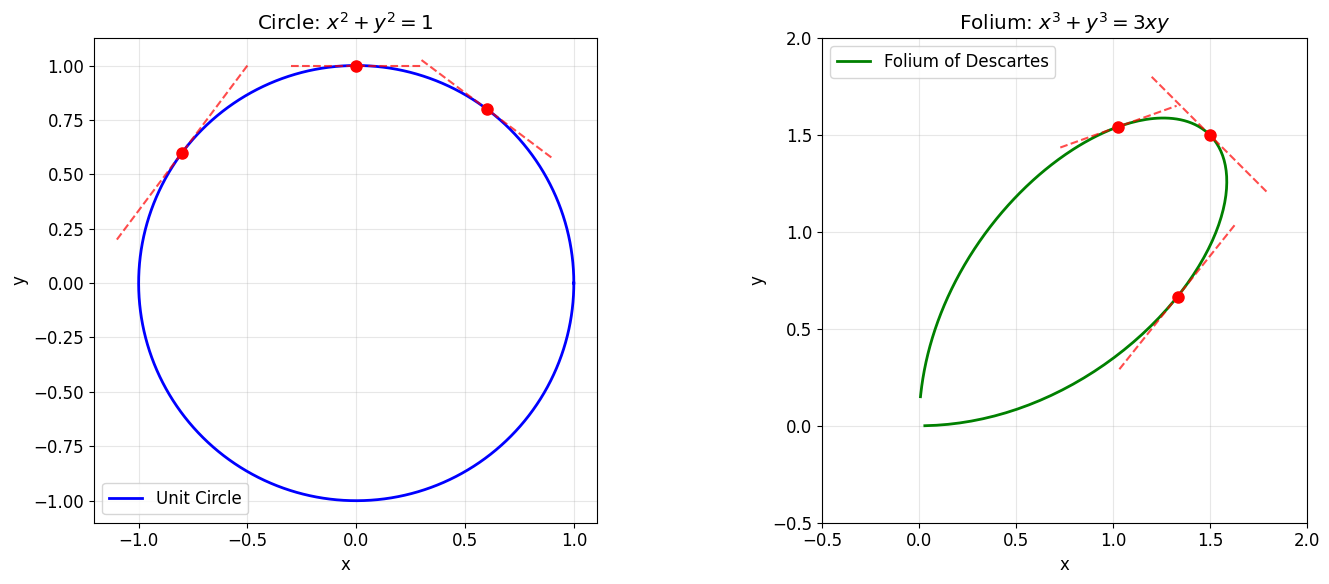

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp
from sympy import symbols, diff, lambdify, solve

x, y = symbols('x y')

# Define the circle function f(x,y) = x^2 + y^2 - 1
f_circle = x**2 + y**2 - 1

print("Function f(x,y) =", f_circle)

# Compute partial derivatives
df_dx = diff(f_circle, x)
df_dy = diff(f_circle, y)

print(f"∂f/∂x = {df_dx}")
print(f"∂f/∂y = {df_dy}")

# Derivative of implicit function
dphi_dx = -df_dx / df_dy
print(f"dφ/dx = -({df_dx})/({df_dy}) = {dphi_dx}")

### Example 2: More Complex Implicit Function (Folium of Descartes)

# Define the folium of Descartes
f_folium = x**3 + y**3 - 3*x*y

print("Function f(x,y) =", f_folium)

# Compute partial derivatives
df_dx_folium = diff(f_folium, x)
df_dy_folium = diff(f_folium, y)

print(f"∂f/∂x = {df_dx_folium}")
print(f"∂f/∂y = {df_dy_folium}")

# Derivative of implicit function
dphi_dx_folium = -df_dx_folium / df_dy_folium
print(f"dφ/dx = {dphi_dx_folium}")

# Simplify the expression
dphi_dx_folium_simplified = sp.simplify(dphi_dx_folium)
print(f"Simplified: dφ/dx = {dphi_dx_folium_simplified}")


### Visualization

def plot_implicit_curves():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Circle with tangent lines
    theta = np.linspace(0, 2*np.pi, 1000)
    x_circle = np.cos(theta)
    y_circle = np.sin(theta)
    
    ax1.plot(x_circle, y_circle, 'b-', linewidth=2, label='Unit Circle')
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Circle: $x^2 + y^2 = 1$')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    # Add tangent lines at specific points
    points_x = [0.6, -0.8, 0.0]
    for x_pt in points_x:
        if abs(x_pt) < 1:  # Ensure point is on circle
            y_pt = np.sqrt(1 - x_pt**2)  # Upper semicircle
            # slope = dphi_dx.subs({x: x_pt, y: y_pt})
            slope = dphi_dx.subs({x: x_pt, y: y_pt})
            
            # Plot tangent line
            if abs(slope) < 10:  # Avoid nearly vertical lines
                x_tan = np.linspace(x_pt - 0.3, x_pt + 0.3, 100)
                y_tan = y_pt + slope * (x_tan - x_pt)
                ax1.plot(x_tan, y_tan, 'r--', alpha=0.7)
            
            ax1.plot(x_pt, y_pt, 'ro', markersize=8)
    
    ax1.legend()
    
    # Plot 2: Folium of Descartes (parametric form for visualization)
    t = np.linspace(0.01, 20, 1000)
    x_folium = 3*t / (1 + t**3)
    y_folium = 3*t**2 / (1 + t**3)
    
    ax2.plot(x_folium, y_folium, 'g-', linewidth=2, label='Folium of Descartes')
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Folium: $x^3 + y^3 = 3xy$')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_xlim(-0.5, 2)
    ax2.set_ylim(-0.5, 2)

    points_t = [0.5, 1.0, 1.5]
    for t_pt in points_t:
        x_pt = 3*t_pt / (1 + t_pt**3)
        y_pt = 3*t_pt**2 / (1 + t_pt**3)

        slope = dphi_dx_folium.subs({x: x_pt, y: y_pt})

        if abs(slope) < 10:  # Avoid nearly vertical lines
            x_tan = np.linspace(x_pt - 0.3, x_pt + 0.3, 100)
            y_tan = y_pt + slope * (x_tan - x_pt)
            ax2.plot(x_tan, y_tan, 'r--', alpha=0.7)
        
        ax2.plot(x_pt, y_pt, 'ro', markersize=8)

    ax2.legend()
    
    plt.tight_layout()
    plt.show()

plot_implicit_curves()


### Relation to HEP analysis
We want to optimize the significance (our physics objective) with respect to (all) parameters analysis pipeline, like cut thresholds or model hyperparameters. BUT: To compute the significance, we first fit a model to the observed data—this involves likelihood maximization, which is an inner optimization loop.

This creates a nested dependency:
 * The significance depends on the post-fit model parameters
 * Those post-fit parameters depend on upstream variables (e.g., selection cuts)

$$
\text{Significance} = S(\theta^*(\alpha), \alpha)
$$

* $\alpha$ are upstream parameters (e.g. cut thresholds)
* $\theta^*(\alpha)$ is the best fit result
* $S$ is our objective - the significance computed after the fit

The best fit result maximizes the likelihood:

$$
\theta^*(\alpha) = \arg\max_\theta \mathcal{L}(\theta; D(\alpha))
$$

where $D(\alpha)$ are the static inputs to the fit (e.g. the nominal prefit histograms). The local extremum implies a vanishing gradient:

$$
\nabla_\theta \mathcal{L}(\theta^*(\alpha); D(\alpha)) = 0
$$

This defines an implicit function: $\theta^*(\alpha)$ like so

$$
F(\theta, \alpha) := \nabla_\theta \mathcal{L}(\theta; D(\alpha)) = 0
$$

Using the implicit function theorem from above, we find:
$$
\frac{d\theta^*}{d\alpha} = -\left( \frac{\partial F}{\partial \theta} \right)^{-1} \cdot \frac{\partial F}{\partial \alpha} = -\left( \frac{\partial^2 \mathcal{L}}{\partial \theta^2} \right)^{-1} \cdot \frac{d}{d\alpha} \left( \frac{\partial \mathcal{L}}{\partial \theta} \right)
$$

More explicitly, using the chain rule on the right-hand-side:

$$
\frac{d\theta^*}{d\alpha} = -\left( \frac{\partial^2 \mathcal{L}}{\partial \theta^2} \right)^{-1} \cdot \left( \frac{\partial^2 \mathcal{L}}{\partial \theta \, \partial \alpha} + \frac{\partial^2 \mathcal{L}}{\partial \theta \, \partial D} \cdot \frac{dD}{d\alpha} \right)
$$

Let's assume $\mathcal{L}$ only depends on $\alpha$ only via the fit inputs $D(\alpha)$ (@Mo, this basically what you brought up in our chat earlier today)
$$
\frac{d\theta^*}{d\alpha} = -\left( \frac{\partial^2 \mathcal{L}}{\partial \theta^2} \right)^{-1} \cdot \left( \frac{\partial^2 \mathcal{L}}{\partial \theta \, \partial D} \cdot \frac{dD}{d\alpha} \right)
$$
Now, to optimize the significance w.r.t. $\alpha$, we want

$$
\frac{dS}{d\alpha} = \frac{\partial S}{\partial \alpha} + \frac{\partial S}{\partial \theta^*} \cdot \frac{d\theta^*}{d\alpha}
$$

Where we can insert the expression above for $\frac{d\theta^*}{d\alpha}$:

$$
\frac{dS}{d\alpha} = \frac{\partial S}{\partial \alpha} - \frac{\partial S}{\partial \theta^*} \cdot \left( \frac{\partial^2 \mathcal{L}}{\partial \theta^2} \right)^{-1} \cdot \left( \frac{\partial^2 \mathcal{L}}{\partial \theta \, \partial D} \cdot \frac{dD}{d\alpha} \right)
$$

We now have an expression for the gradient of the significance w.r.t. our upstream parameters, under the boundary condition that the likelihood is stationary. This means we can compute gradients and perform optimization without explicitly unrolling the fitting loop—we only need to differentiate through the final fixed-point solution. That allows us to run gradient descent on our upstream parameters while always staying on the likelihood's best-fit manifold. Very neat!